CIFAR10 TUTORIAL


https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py


In [1]:
# 라이브러리 임포트
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), #  ToTensor()로 타입 변경시 0 ~ 1 사이의 값으로 바뀜.
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # Mean (RGB), STD(RGB)
                                                              # 최종적으로 -1 ~ 1사이의 값으로 normalized 시킴 (X-mean)/std

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

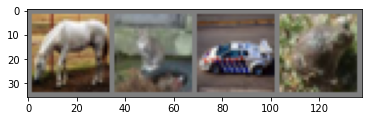

horse   cat   car  frog


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [6]:
images[0]

tensor([[[ 0.4588,  0.4510,  0.4588,  ...,  0.5137,  0.1451,  0.3569],
         [ 0.4745,  0.4667,  0.4353,  ...,  0.5216,  0.1451,  0.3490],
         [ 0.3961,  0.3882,  0.3804,  ...,  0.4510,  0.0824,  0.2706],
         ...,
         [-0.7255, -0.7412, -0.7255,  ..., -0.7725, -0.7569, -0.7490],
         [-0.5843, -0.5765, -0.5451,  ..., -0.7020, -0.6706, -0.6941],
         [-0.5608, -0.5137, -0.4824,  ..., -0.6784, -0.6706, -0.7412]],

        [[ 0.1137,  0.1137,  0.1216,  ...,  0.1765, -0.3255, -0.0039],
         [ 0.1059,  0.0980,  0.0667,  ...,  0.1451, -0.3490,  0.0118],
         [ 0.0745,  0.0667,  0.0588,  ...,  0.0980, -0.3804, -0.0275],
         ...,
         [-0.8353, -0.8353, -0.8118,  ..., -0.8745, -0.8588, -0.8510],
         [-0.7412, -0.7412, -0.7020,  ..., -0.7961, -0.7569, -0.7804],
         [-0.7255, -0.6941, -0.6863,  ..., -0.7569, -0.7490, -0.8196]],

        [[-0.3490, -0.3412, -0.3412,  ..., -0.1686, -0.4980, -0.2863],
         [-0.3412, -0.3412, -0.3725,  ..., -0

In [7]:
images.shape

torch.Size([4, 3, 32, 32])

In [8]:
images[0].max()

tensor(0.9686)

In [9]:
images[0].min()

tensor(-1.)

In [10]:
t = images[0]/2 +0.5

In [11]:
t.max()

tensor(0.9843)

In [12]:
t.min()

tensor(0.)

Conv2D

torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)

https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html


https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

In [13]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [14]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


summary를 확인하는 라이브러를 통해 좀 더 상세하게 볼 수 있음

torchsummary의 경우 인풋 사이즈 입력이 필요함

In [15]:
from torchsummary import summary

model = net.to(device)

summary(model, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 62,006
Trainable params: 62,006
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [16]:
print(device)

cuda:0


In [17]:
dir(device)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'index',
 'type']

In [18]:
device.type

'cuda'

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Python enumerate()

https://realpython.com/python-enumerate/

In [20]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):  #인덱스 0부터 시작
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        #gpu 설정
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.239
[1,  4000] loss: 1.883
[1,  6000] loss: 1.683
[1,  8000] loss: 1.560
[1, 10000] loss: 1.519
[1, 12000] loss: 1.475
[2,  2000] loss: 1.410
[2,  4000] loss: 1.414
[2,  6000] loss: 1.356
[2,  8000] loss: 1.353
[2, 10000] loss: 1.325
[2, 12000] loss: 1.296
Finished Training


In [21]:
PATH = './cifar_net.pt'
torch.save(net, PATH)

In [22]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
dir(net)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_m

In [24]:
net.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-5.0854e-02, -6.1008e-02, -4.9194e-03, -1.9272e-02, -1.5784e-01],
                        [-1.4039e-01, -1.8886e-01, -2.1112e-01, -1.7509e-01, -2.4889e-01],
                        [-2.8370e-01, -2.8486e-01, -3.4074e-01, -3.8303e-01, -3.4236e-01],
                        [ 1.5068e-02, -4.0203e-02, -7.7280e-02, -2.4019e-01, -1.7475e-01],
                        [-1.8889e-01, -1.3281e-01, -1.2234e-01, -1.7712e-01, -2.2073e-01]],
              
                       [[ 2.6529e-02,  8.4254e-03,  1.2855e-01,  1.1119e-01,  1.5814e-01],
                        [ 1.1488e-01,  1.2903e-01,  2.0102e-01,  6.9502e-02,  7.6934e-02],
                        [ 5.7160e-04,  4.1075e-03,  1.2431e-02, -1.1678e-01, -5.1101e-02],
                        [ 7.9797e-03, -3.0271e-02,  1.3857e-01,  1.1638e-01,  2.7501e-02],
                        [ 9.4314e-03, -3.9552e-02,  1.1560e-01,  7.9854e-02,  2.9553e-02]],
              
                       [[ 1.

In [25]:
dir(net.conv1)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_conv_forward',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_reversed_padding_repeated_twice',
 '_save_to_

In [26]:
net.conv1.weight.shape

torch.Size([6, 3, 5, 5])

In [27]:
net.conv1.bias.shape

torch.Size([6])

In [28]:
net.conv1.kernel_size

(5, 5)

모델 불러오기

In [29]:
net_load = Net()

In [30]:
model_loaded = torch.load(PATH)

In [31]:
print(model_loaded)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [32]:
model_loaded.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-5.0854e-02, -6.1008e-02, -4.9194e-03, -1.9272e-02, -1.5784e-01],
                        [-1.4039e-01, -1.8886e-01, -2.1112e-01, -1.7509e-01, -2.4889e-01],
                        [-2.8370e-01, -2.8486e-01, -3.4074e-01, -3.8303e-01, -3.4236e-01],
                        [ 1.5068e-02, -4.0203e-02, -7.7280e-02, -2.4019e-01, -1.7475e-01],
                        [-1.8889e-01, -1.3281e-01, -1.2234e-01, -1.7712e-01, -2.2073e-01]],
              
                       [[ 2.6529e-02,  8.4254e-03,  1.2855e-01,  1.1119e-01,  1.5814e-01],
                        [ 1.1488e-01,  1.2903e-01,  2.0102e-01,  6.9502e-02,  7.6934e-02],
                        [ 5.7160e-04,  4.1075e-03,  1.2431e-02, -1.1678e-01, -5.1101e-02],
                        [ 7.9797e-03, -3.0271e-02,  1.3857e-01,  1.1638e-01,  2.7501e-02],
                        [ 9.4314e-03, -3.9552e-02,  1.1560e-01,  7.9854e-02,  2.9553e-02]],
              
                       [[ 1.

In [33]:
model_loaded(images.to(device))

tensor([[-1.7439, -0.5069, -0.1351,  1.5030, -1.1700,  1.0770,  1.0048,  0.1116,
         -0.7704,  0.5858],
        [ 0.2023, -1.7568,  1.6250,  0.8690,  0.5379,  0.0390, -0.2799, -0.5754,
         -0.0907, -0.9408],
        [ 1.4636,  2.7865, -0.8847, -0.5980, -2.7538, -1.9333, -1.9780, -0.5943,
          0.2535,  4.4371],
        [-1.2615, -1.6312,  1.2413,  1.1090,  1.2089,  1.2369,  0.5804,  0.8380,
         -1.7638, -1.6156]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [34]:
images.shape

torch.Size([4, 3, 32, 32])